In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# All Case Comparison

Compare all cases based on KNN imputation and VAE imputation

## KNN Case Comparison
Compares the KNN performance using data of all cases


In [125]:
fe_knn_9_2_1 = pd.read_csv("data/9_2_1/distance_based/combined_r2_scores.csv")
fe_knn_9_2_1["Case"] = "9 2 1"

fe_knn_9_2_2 = pd.read_csv("data/9_2_2/distance_based/combined_r2_scores.csv")
fe_knn_9_2_2["Case"] = "9 2 2"

fe_knn_9_3_1 = pd.read_csv("data/9_3_1/distance_based/combined_r2_scores.csv")
fe_knn_9_3_1["Case"] = "9 3 1"

fe_knn_9_3_2 = pd.read_csv("data/9_3_2/distance_based/combined_r2_scores.csv")
fe_knn_9_3_2["Case"] = "9 3 2"



In [126]:
fe_knn_combined_scores = pd.concat([fe_knn_9_2_1, fe_knn_9_2_2, fe_knn_9_3_1, fe_knn_9_3_2])
fe_knn_combined_scores.reset_index(drop=True, inplace=True)
fe_knn_combined_scores

Feature     Score  Radius   Case
0               pERK  0.041955      10  9 2 1
1              Rad51  0.000000      10  9 2 1
2              CCND1  0.319215      10  9 2 1
3           Vimentin  0.353381      10  9 2 1
4               aSMA  0.000000      10  9 2 1
..               ...       ...     ...    ...
619  MajorAxisLength  0.663187     100  9 3 2
620  MinorAxisLength  0.702906     100  9 3 2
621         Solidity  0.123418     100  9 3 2
622           Extent  0.112796     100  9 3 2
623     Eccentricity  0.243267     100  9 3 2

[624 rows x 4 columns]

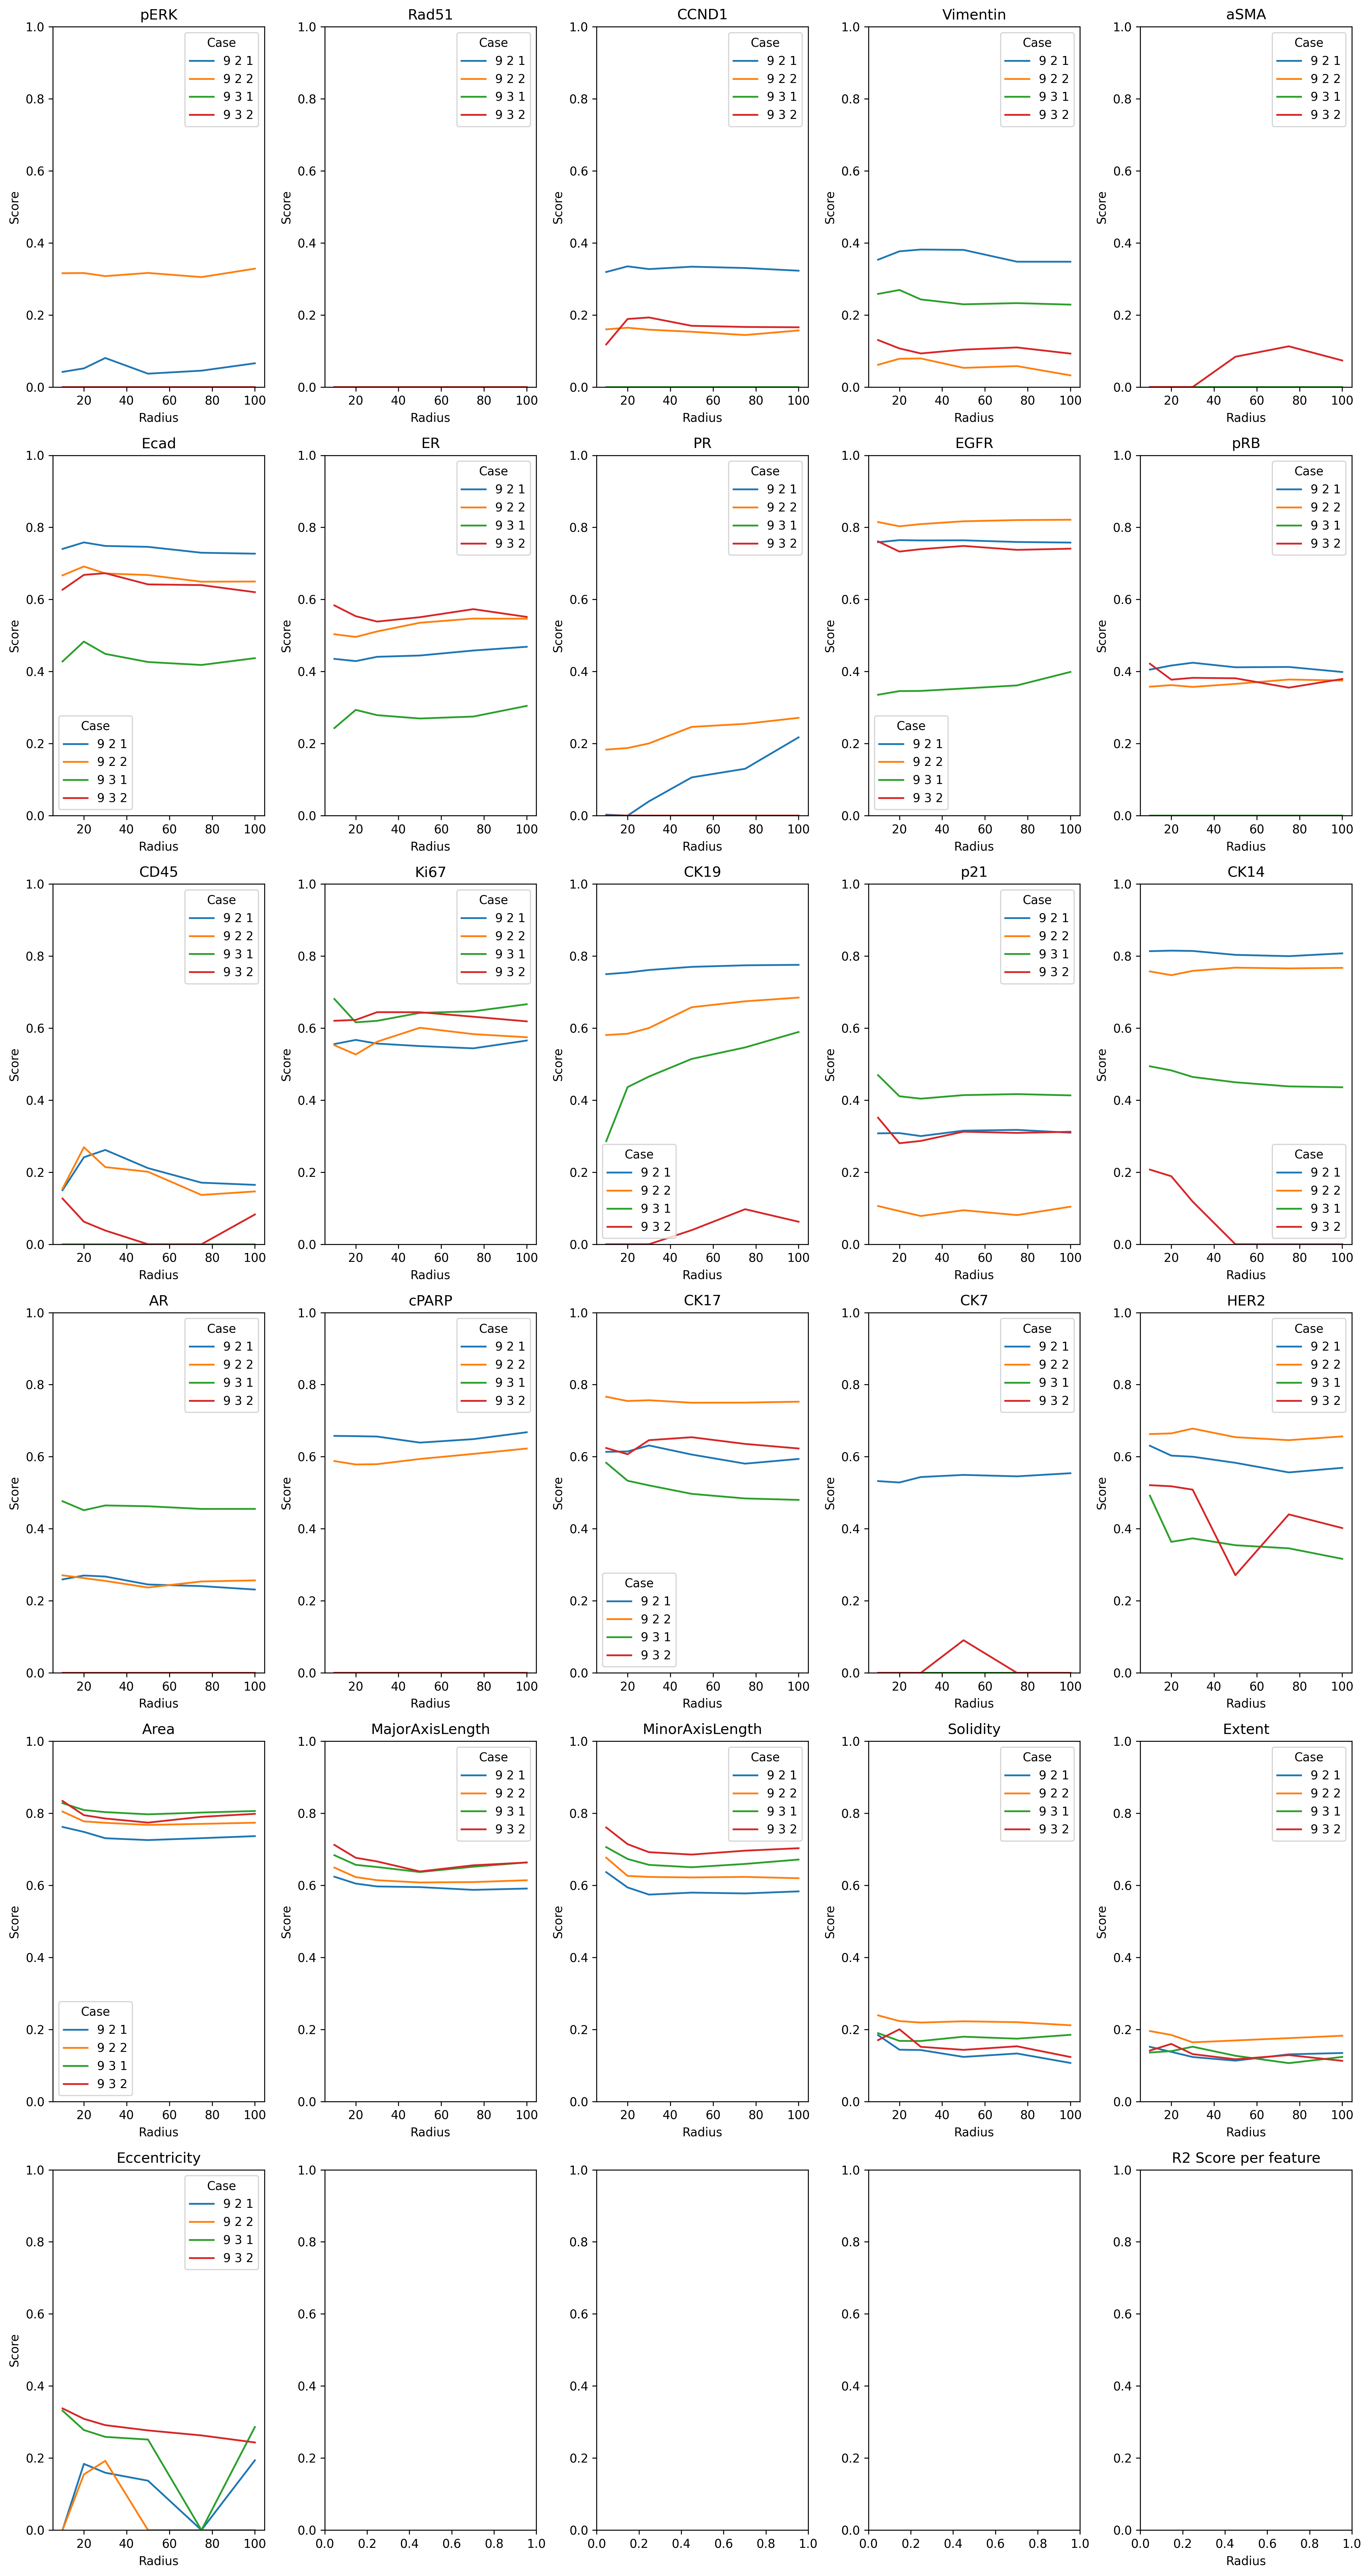

In [127]:
fig, axs = plt.subplots(6, 5, figsize=(16, 30), dpi=300)

row = 0
col = 0

for feature in fe_knn_combined_scores["Feature"].unique():
    sns.lineplot(data=fe_knn_combined_scores[fe_knn_combined_scores["Feature"] == feature], x="Radius", y="Score", hue="Case", ax=axs[col, row])
    axs[col, row].set_title(feature)
    #axs[col, row].get_legend().remove()
    axs[col, row].set_ylim(0, 1)
    
    row +=1
    
    if row == 5:
        row = 0
        col += 1

        
#axs[0][0].legend()

plt.xlabel("Radius")
plt.title("R2 Score per feature")
fig.tight_layout()
plt.savefig(f"data/combined_fe_knn_imputation_performance_per_feature.png",facecolor='w')

## Load improved markers

In [128]:
fe_knn_improved_features_9_2_1 = pd.read_csv("data/9_2_1/fe_knn_vs_no_spatial_neighborhood.csv")
fe_knn_improved_features_9_2_2 = pd.read_csv("data/9_2_2/fe_knn_vs_no_spatial_neighborhood.csv")
fe_knn_improved_features_9_3_1 = pd.read_csv("data/9_3_1/fe_knn_vs_no_spatial_neighborhood.csv")
fe_knn_improved_features_9_3_2 = pd.read_csv("data/9_3_2/fe_knn_vs_no_spatial_neighborhood.csv")

fe_knn_improved_features_9_3_2

Feature     Score          Origin  Radius
0    CCND1  0.188836  Distance Based      20
1    CCND1  0.193038  Distance Based      30
2    CCND1  0.169879  Distance Based      50
3    CCND1  0.166701  Distance Based      75
4    CCND1  0.165790  Distance Based     100
5     aSMA  0.084025  Distance Based      50
6     aSMA  0.113019  Distance Based      75
7     aSMA  0.073633  Distance Based     100
8     Ecad  0.668179  Distance Based      20
9     Ecad  0.672848  Distance Based      30
10    Ki67  0.620234  Distance Based      10
11    Ki67  0.622630  Distance Based      20
12    Ki67  0.644102  Distance Based      30
13    Ki67  0.643930  Distance Based      50
14    Ki67  0.631499  Distance Based      75
15    Ki67  0.618581  Distance Based     100

In [129]:
features_to_impute = pd.read_csv("data/9_2_1/distance_based/features_to_impute.csv")
features_to_impute = features_to_impute["0"].to_list()

    
features_to_impute

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity']

In [130]:
def calculate_percentage_improvement(radius: int):
    fe_knn_percentage_data = [
    {
        "Case": "9 2 1",
        "Improvement": len(fe_knn_improved_features_9_2_1[fe_knn_improved_features_9_2_1["Radius"] == radius]) / len(features_to_impute)
    },
    {
        "Case": "9 2 2",
        "Improvement": len(fe_knn_improved_features_9_2_2[fe_knn_improved_features_9_2_2["Radius"] == radius]) / len(features_to_impute)
    },
    {
        "Case": "9 3 1",
        "Improvement": len(fe_knn_improved_features_9_3_1[fe_knn_improved_features_9_3_1["Radius"] == radius]) / len(features_to_impute)
    },
    {
        "Case": "9 3 2",
        "Improvement": len(fe_knn_improved_features_9_3_2[fe_knn_improved_features_9_3_2["Radius"] == radius]) / len(features_to_impute)
    },
    ]
    
    return pd.DataFrame().from_records(fe_knn_percentage_data)

In [131]:
fe_knn_10_radius_improvement_by_percent = calculate_percentage_improvement(10)
fe_knn_20_radius_improvement_by_percent = calculate_percentage_improvement(20)
fe_knn_30_radius_improvement_by_percent = calculate_percentage_improvement(30)
fe_knn_50_radius_improvement_by_percent = calculate_percentage_improvement(50)
fe_knn_75_radius_improvement_by_percent = calculate_percentage_improvement(75)
fe_knn_100_radius_improvement_by_percent = calculate_percentage_improvement(100)


# % Improvement of features

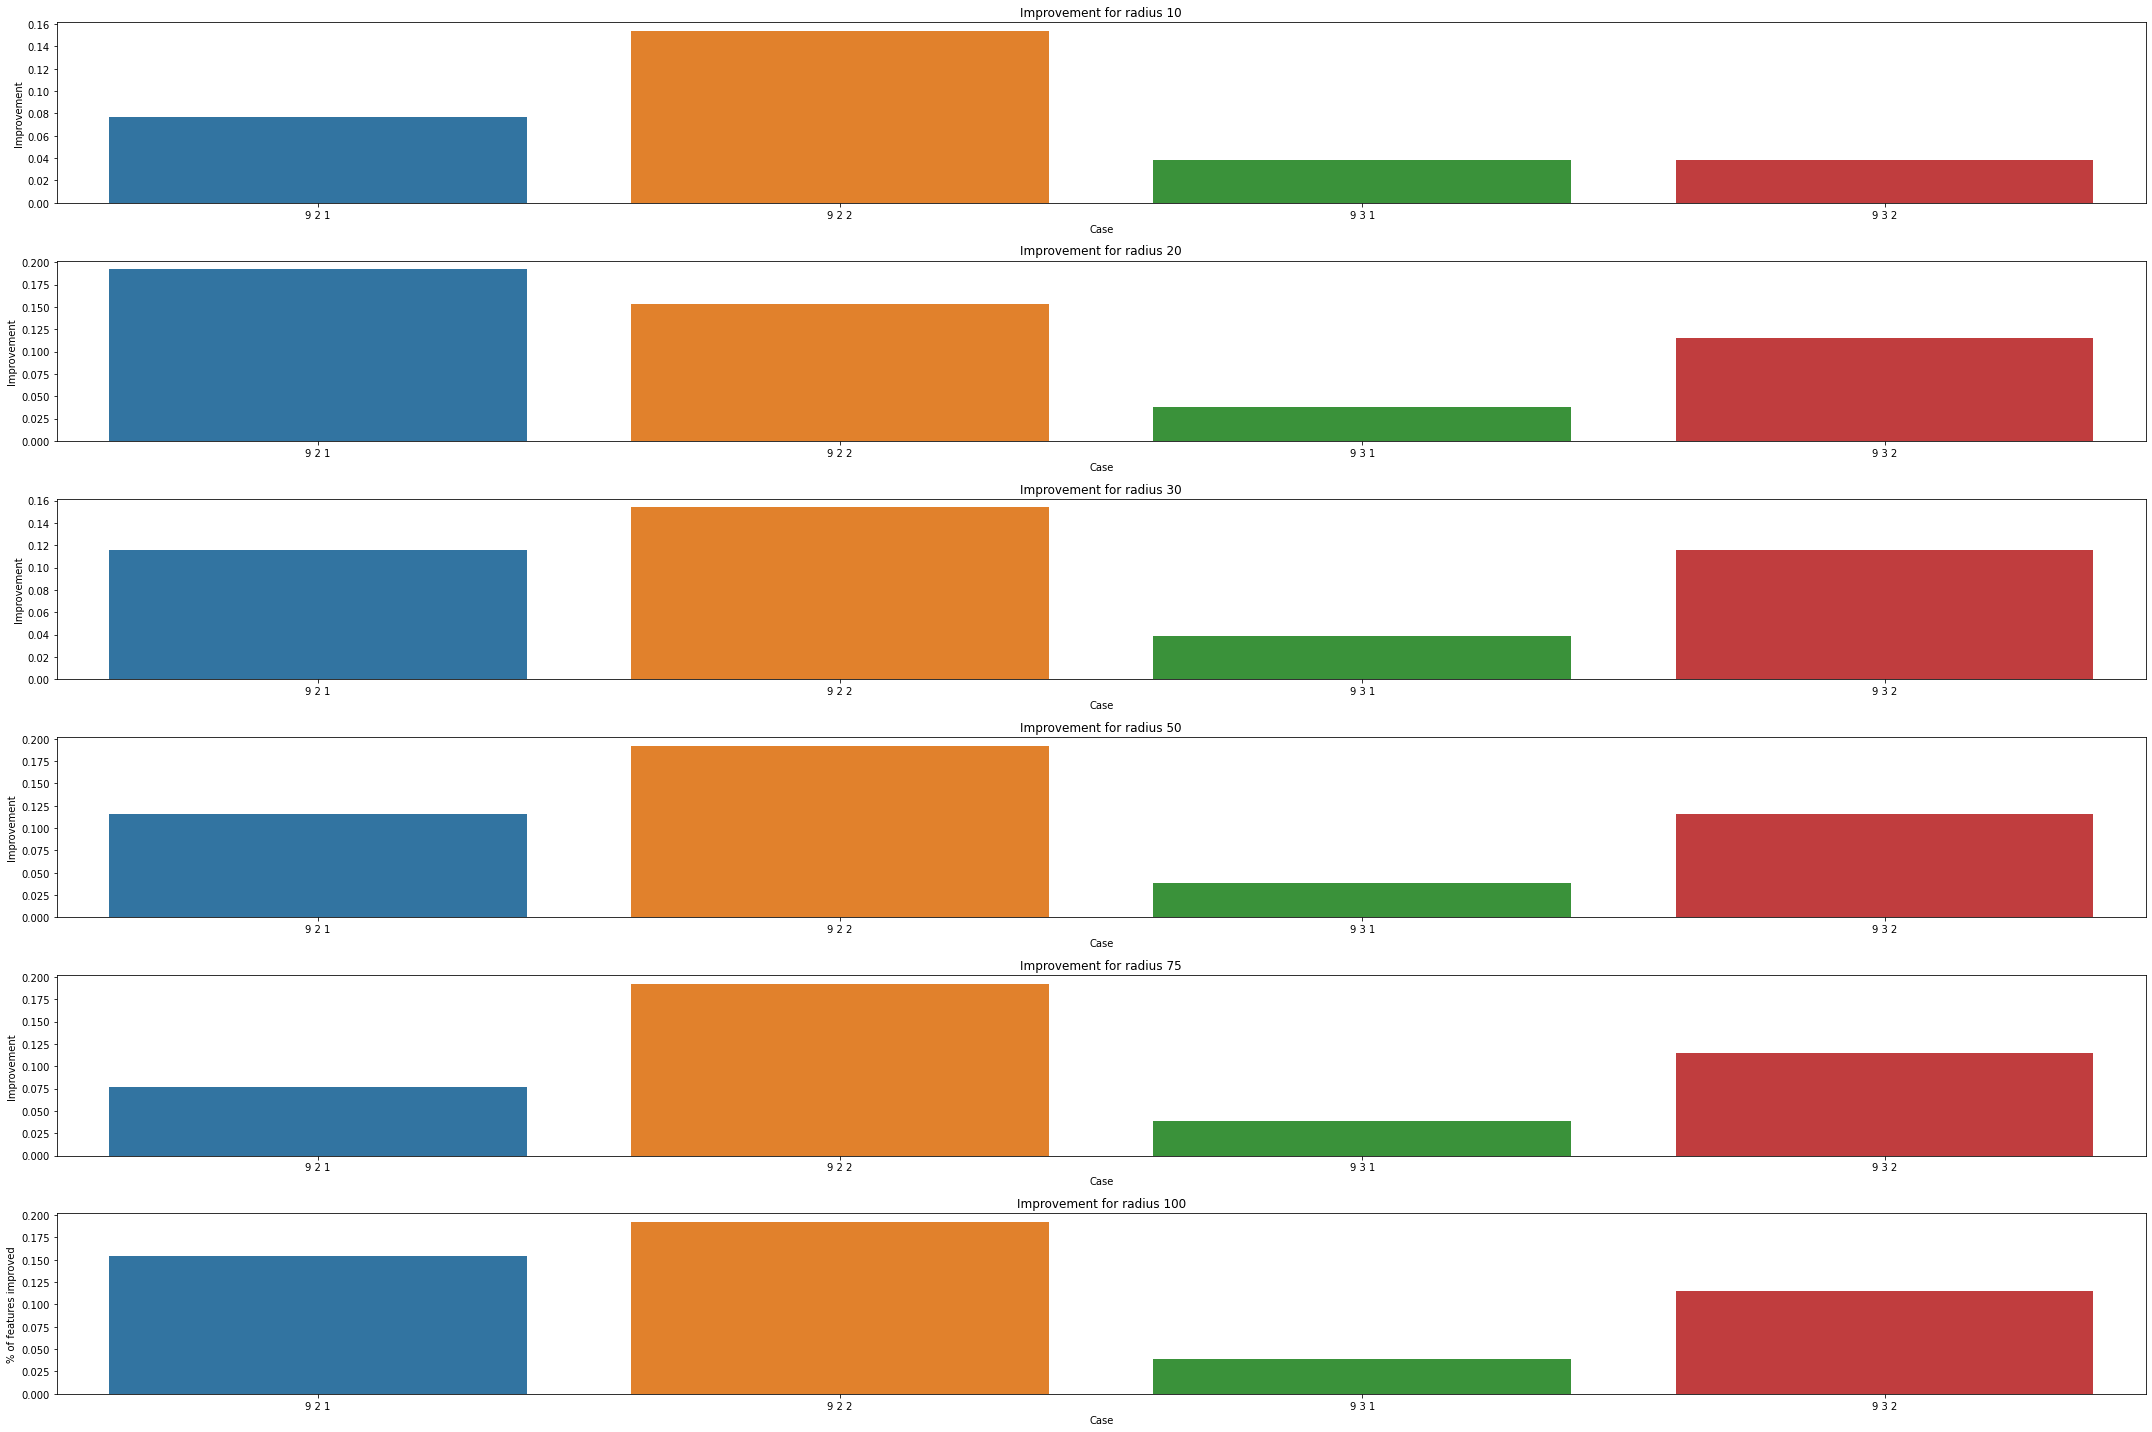

In [132]:
# Creating plot
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,  figsize =(30, 20))
sns.barplot(x="Case", y="Improvement", data=fe_knn_10_radius_improvement_by_percent, ax=ax1)
sns.barplot(x="Case", y="Improvement", data=fe_knn_20_radius_improvement_by_percent, ax=ax2)
sns.barplot(x="Case", y="Improvement", data=fe_knn_30_radius_improvement_by_percent, ax=ax3)
sns.barplot(x="Case", y="Improvement", data=fe_knn_50_radius_improvement_by_percent, ax=ax4)
sns.barplot(x="Case", y="Improvement", data=fe_knn_75_radius_improvement_by_percent, ax=ax5)
sns.barplot(x="Case", y="Improvement", data=fe_knn_100_radius_improvement_by_percent, ax=ax6)

ax1.set_title("Improvement for radius 10")
ax2.set_title("Improvement for radius 20")
ax3.set_title("Improvement for radius 30")
ax4.set_title("Improvement for radius 50")
ax5.set_title("Improvement for radius 75")
ax6.set_title("Improvement for radius 100")
 
plt.ylabel("% of features improved")
plt.tight_layout()
# show plot
plt.show()

# Inspect improved features

In [133]:
def extract_improved_features(radius: int):
    knn_features_9_2_1 = pd.DataFrame (fe_knn_improved_features_9_2_1[fe_knn_improved_features_9_2_1["Radius"] == radius]["Feature"], columns = ['Feature'])
    knn_features_9_2_1["Case"] = "9 2 1"

    knn_features_9_2_2 = pd.DataFrame (fe_knn_improved_features_9_2_2[fe_knn_improved_features_9_2_2["Radius"] == radius]["Feature"], columns = ['Feature'])
    knn_features_9_2_2["Case"] = "9 2 2"

    knn_features_9_3_1 = pd.DataFrame (fe_knn_improved_features_9_3_1[fe_knn_improved_features_9_3_1["Radius"] == radius]["Feature"], columns = ['Feature'])
    knn_features_9_3_1["Case"] = "9 3 1"

    knn_features_9_3_2 = pd.DataFrame (fe_knn_improved_features_9_3_2[fe_knn_improved_features_9_3_2["Radius"] == radius]["Feature"], columns = ['Feature'])
    knn_features_9_3_2["Case"] = "9 3 2"
    
    return pd.concat([knn_features_9_2_1, knn_features_9_2_2, knn_features_9_3_1, knn_features_9_3_2])






In [134]:
r_10_unique_counts = pd.DataFrame(extract_improved_features(10)["Feature"].value_counts()).reset_index()
r_10_unique_counts.rename(columns={"index": "Feature", "Feature": "Count"}, inplace=True)

r_20_unique_counts = pd.DataFrame(extract_improved_features(20)["Feature"].value_counts()).reset_index()
r_20_unique_counts.rename(columns={"index": "Feature", "Feature": "Count"}, inplace=True)

r_30_unique_counts = pd.DataFrame(extract_improved_features(30)["Feature"].value_counts()).reset_index()
r_30_unique_counts.rename(columns={"index": "Feature", "Feature": "Count"}, inplace=True)

r_50_unique_counts = pd.DataFrame(extract_improved_features(50)["Feature"].value_counts()).reset_index()
r_50_unique_counts.rename(columns={"index": "Feature", "Feature": "Count"}, inplace=True)

r_75_unique_counts = pd.DataFrame(extract_improved_features(75)["Feature"].value_counts()).reset_index()
r_75_unique_counts.rename(columns={"index": "Feature", "Feature": "Count"}, inplace=True)

r_100_unique_counts = pd.DataFrame(extract_improved_features(100)["Feature"].value_counts()).reset_index()
r_100_unique_counts.rename(columns={"index": "Feature", "Feature": "Count"}, inplace=True)




In [135]:
print(f"% of all features improved: {round(len(r_10_unique_counts) / len(features_to_impute) * 100, 2)}%")
print(f"% of all features improved: {round(len(r_20_unique_counts) / len(features_to_impute) * 100, 2)}%")
print(f"% of all features improved: {round(len(r_30_unique_counts) / len(features_to_impute) * 100, 2)}%")
print(f"% of all features improved: {round(len(r_50_unique_counts) / len(features_to_impute) * 100, 2)}%")
print(f"% of all features improved: {round(len(r_75_unique_counts) / len(features_to_impute) * 100, 2)}%")
print(f"% of all features improved: {round(len(r_100_unique_counts) / len(features_to_impute) * 100, 2)}%")

% of all features improved: 26.92%
% of all features improved: 34.62%
% of all features improved: 34.62%
% of all features improved: 34.62%
% of all features improved: 30.77%
% of all features improved: 30.77%


## Show occurence of feature improvement

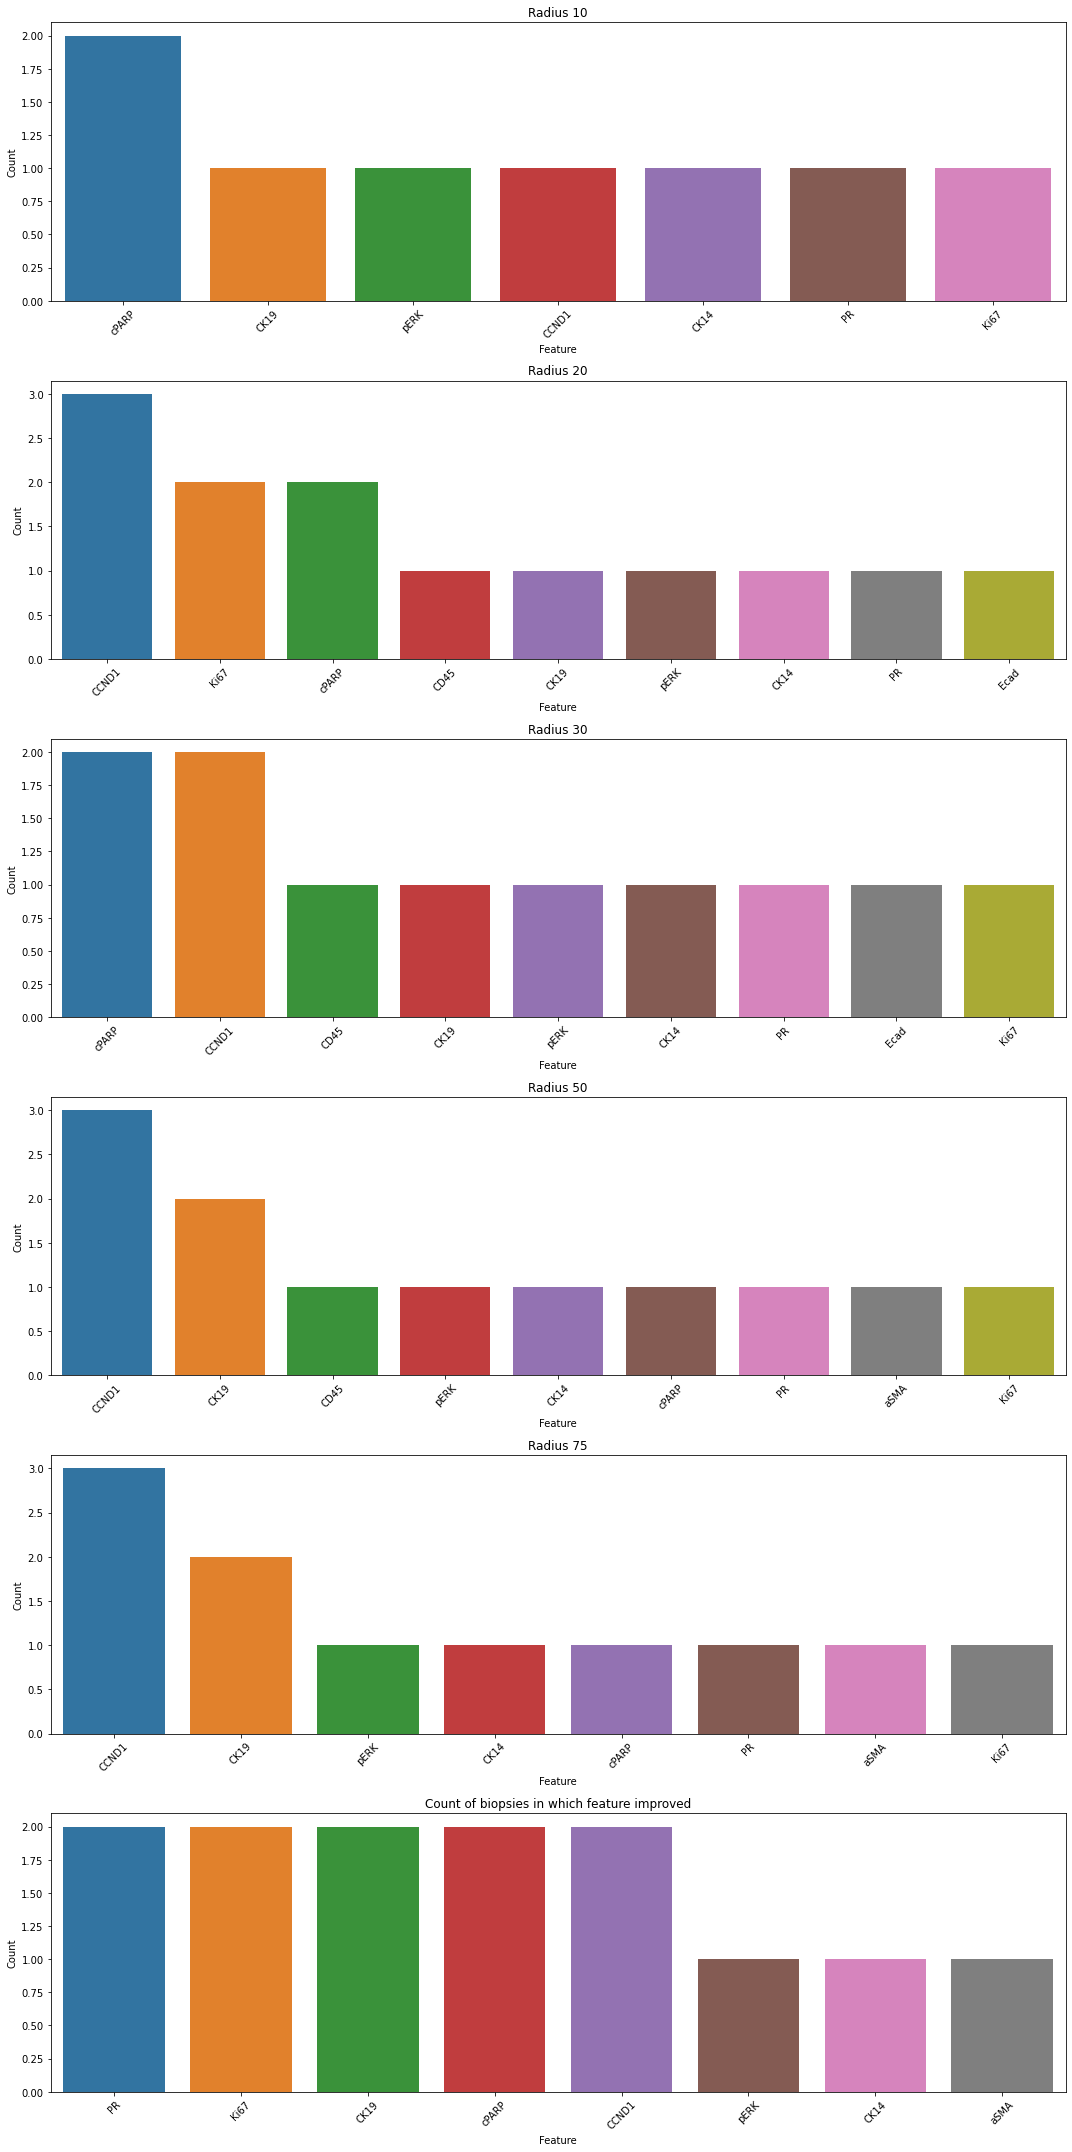

In [136]:

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15,30))

sns.barplot(x="Feature", y="Count", data=r_10_unique_counts, ax=ax1)
sns.barplot(x="Feature", y="Count", data=r_20_unique_counts, ax=ax2)
sns.barplot(x="Feature", y="Count", data=r_30_unique_counts, ax=ax3)
sns.barplot(x="Feature", y="Count", data=r_50_unique_counts, ax=ax4)
sns.barplot(x="Feature", y="Count", data=r_75_unique_counts, ax=ax5)
sns.barplot(x="Feature", y="Count", data=r_100_unique_counts, ax=ax6)

ax1.set_title("Radius 10")
ax2.set_title("Radius 20")
ax3.set_title("Radius 30")
ax4.set_title("Radius 50")
ax5.set_title("Radius 75")
ax6.set_title("Radius 100")


for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.title("Count of biopsies in which feature improved")
plt.tight_layout()
plt.show()

## Features that didnt improve

In [137]:
#knn_improved_features = knn_unique_counts["Feature"].to_list()

#knn_non_improved =  set(features_to_impute) - set(knn_improved_features)  #  & calculates the intersection.
#print(knn_non_improved)

NameError: name 'knn_unique_counts' is not defined

In [139]:
knn_best_performing_features = pd.concat([knn_best_performing_feature_r2_scores_9_2_1, knn_best_performing_feature_r2_scores_9_2_2, knn_best_performing_feature_r2_scores_9_3_1, knn_best_performing_feature_r2_scores_9_3_2])
knn_best_performing_features


NameError: name 'knn_best_performing_feature_r2_scores_9_2_1' is not defined

## VAE Generalization comparison

In [140]:
percentage = "0_2"

In [141]:
vae_9_2_1 = pd.read_csv(f"data/9_2_1/vae_normal/{percentage}/combined_r2_scores.csv")
vae_9_2_1["Case"] = "9 2 1"

vae_9_2_2 = pd.read_csv(f"data/9_2_2/vae_normal/{percentage}/combined_r2_scores.csv")
vae_9_2_2["Case"] = "9 2 2"

vae_9_3_1 = pd.read_csv(f"data/9_3_1/vae_normal/{percentage}/combined_r2_scores.csv")
vae_9_3_1["Case"] = "9 3 1"

vae_9_3_2 = pd.read_csv(f"data/9_3_2/vae_normal/{percentage}/combined_r2_scores.csv")
vae_9_3_2["Case"] = "9 3 2"


vae_combined_scores = pd.concat([vae_9_2_1, vae_9_2_2, vae_9_3_1, vae_9_3_2])
vae_combined_scores.reset_index(drop=True, inplace=True)
vae_combined_scores

Feature     Score  Radius   Case
0               pERK  0.225875      10  9 2 1
1              Rad51  0.106764      10  9 2 1
2              CCND1  0.254550      10  9 2 1
3           Vimentin  0.480537      10  9 2 1
4               aSMA  0.000000      10  9 2 1
..               ...       ...     ...    ...
619  MajorAxisLength  0.665003     100  9 3 2
620  MinorAxisLength  0.687733     100  9 3 2
621         Solidity  0.352681     100  9 3 2
622           Extent  0.435679     100  9 3 2
623     Eccentricity  0.223634     100  9 3 2

[624 rows x 4 columns]

# VAE Score Comparison

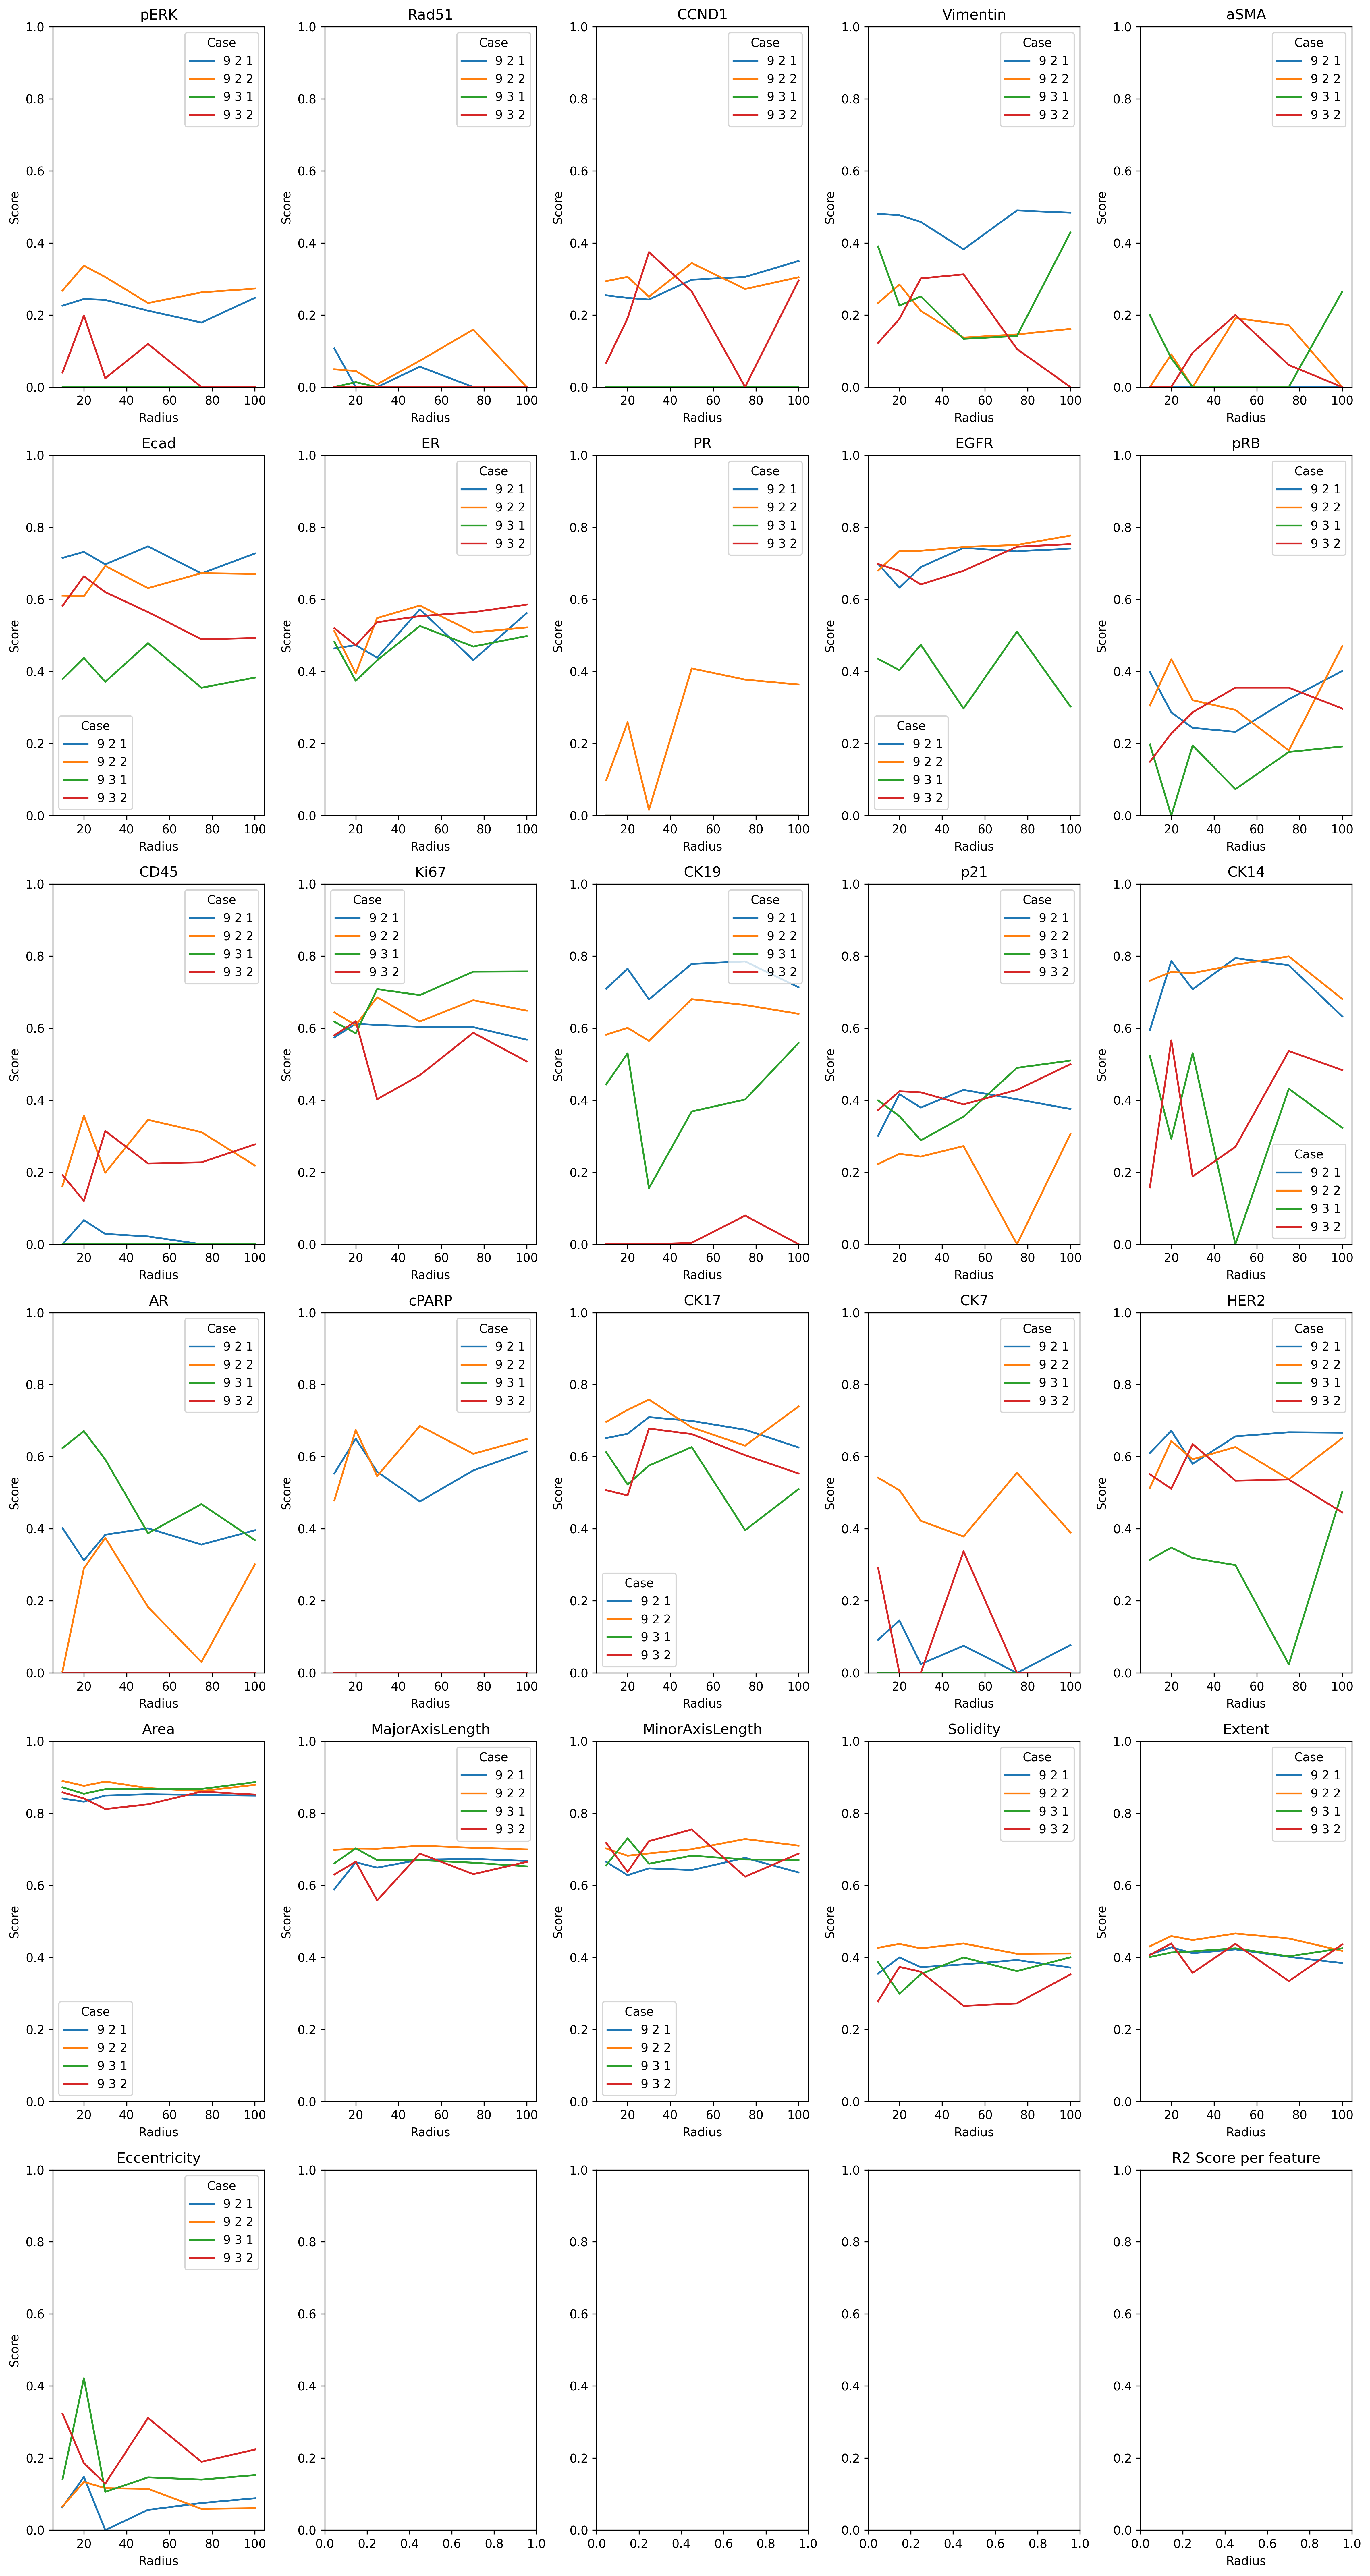

In [142]:
fig, axs = plt.subplots(6, 5, figsize=(16, 30), dpi=300)

row = 0
col = 0

for feature in vae_combined_scores["Feature"].unique():
    sns.lineplot(data=vae_combined_scores[vae_combined_scores["Feature"] == feature], x="Radius", y="Score", hue="Case", ax=axs[col, row])
    axs[col, row].set_title(feature)
    #axs[col, row].get_legend().remove()
    axs[col, row].set_ylim(0, 1)
    
    row +=1
    
    if row == 5:
        row = 0
        col += 1

        
#axs[0][0].legend()

plt.xlabel("Radius")
plt.title("R2 Score per feature")
fig.tight_layout()
plt.savefig(f"data/combined_vae_imputation_performance_per_feature.png",facecolor='w')

# Combine all data


In [143]:
vae_combined_scores["Origin"] = "VAE"
fe_knn_combined_scores["Origin"] = "FE KNN"
all_data_combined_scores = pd.concat([vae_combined_scores, fe_knn_combined_scores])
all_data_combined_scores.reset_index(drop=True, inplace=True)

# VAE vs FE KNN Score Comparison

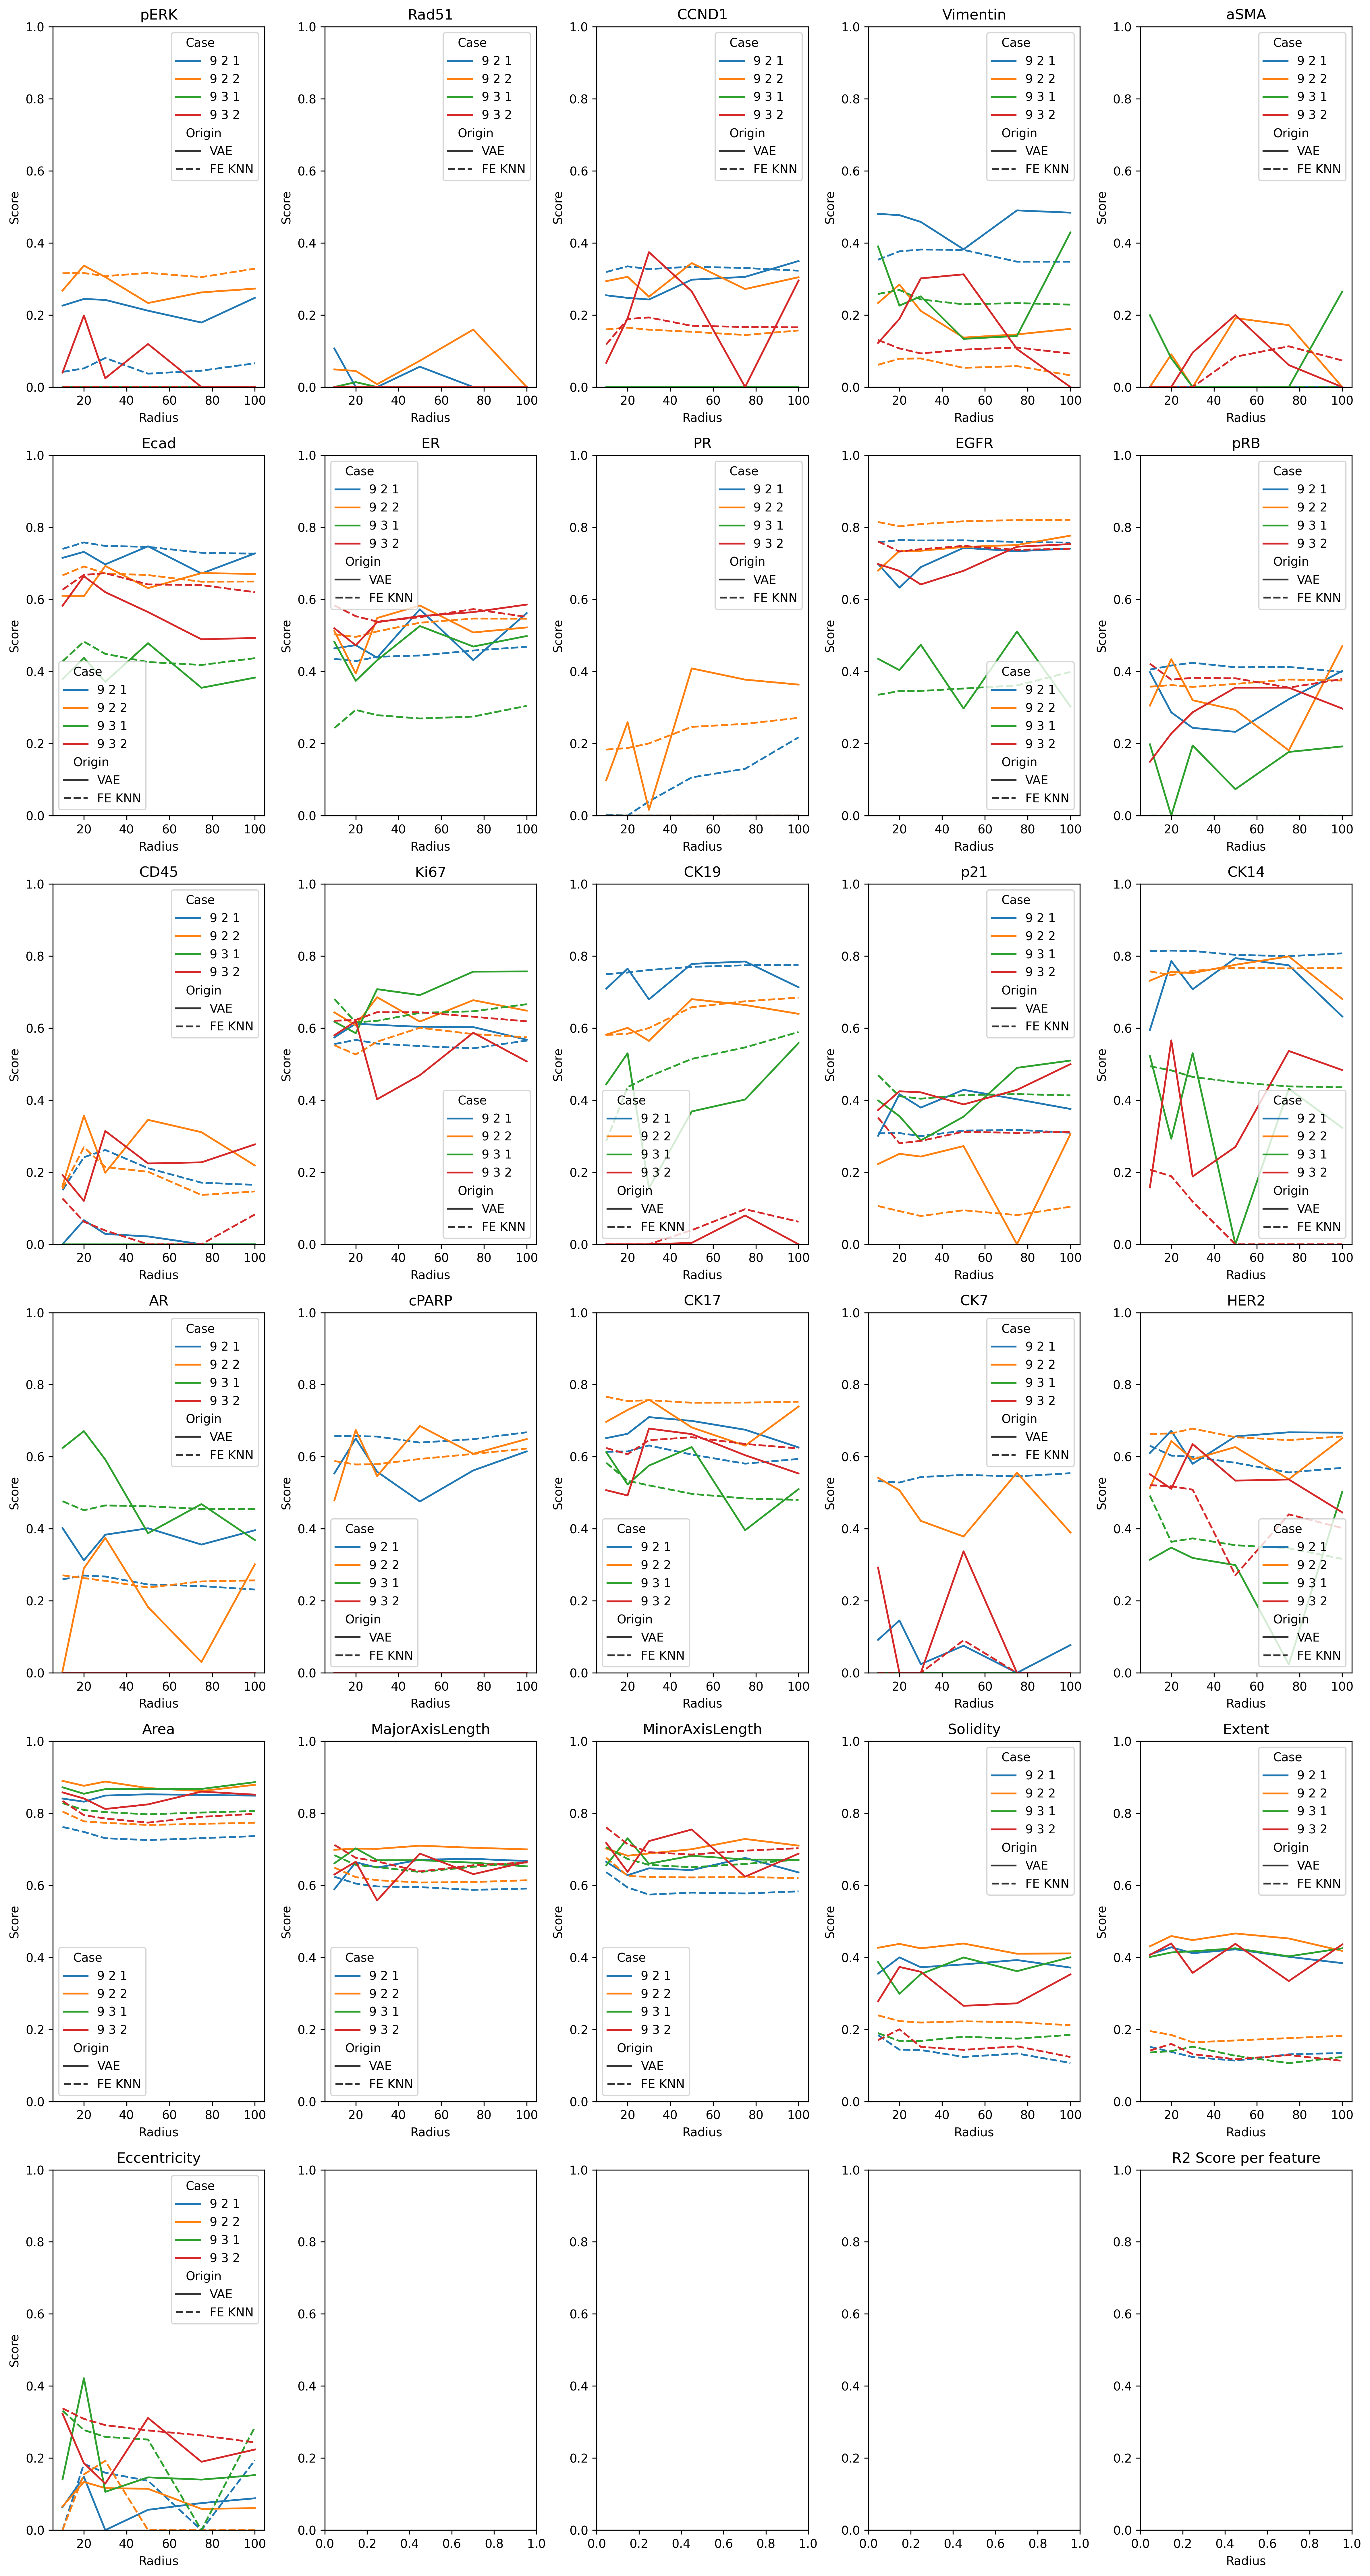

In [144]:
fig, axs = plt.subplots(6, 5, figsize=(16, 30), dpi=300)

row = 0
col = 0

for feature in all_data_combined_scores["Feature"].unique():
    sns.lineplot(data=all_data_combined_scores[all_data_combined_scores["Feature"] == feature], x="Radius", y="Score", hue="Case", style="Origin", ax=axs[col, row])
    axs[col, row].set_title(feature)
    #axs[col, row].get_legend().remove()
    axs[col, row].set_ylim(0, 1)
    
    row +=1
    
    if row == 5:
        row = 0
        col += 1

        
#axs[0][0].legend()

plt.xlabel("Radius")
plt.title("R2 Score per feature")
fig.tight_layout()
plt.savefig(f"data/all_data_combined_imputation_performance_per_feature.png",facecolor='w')

## VAE vs FE KNN for selected tumor marker

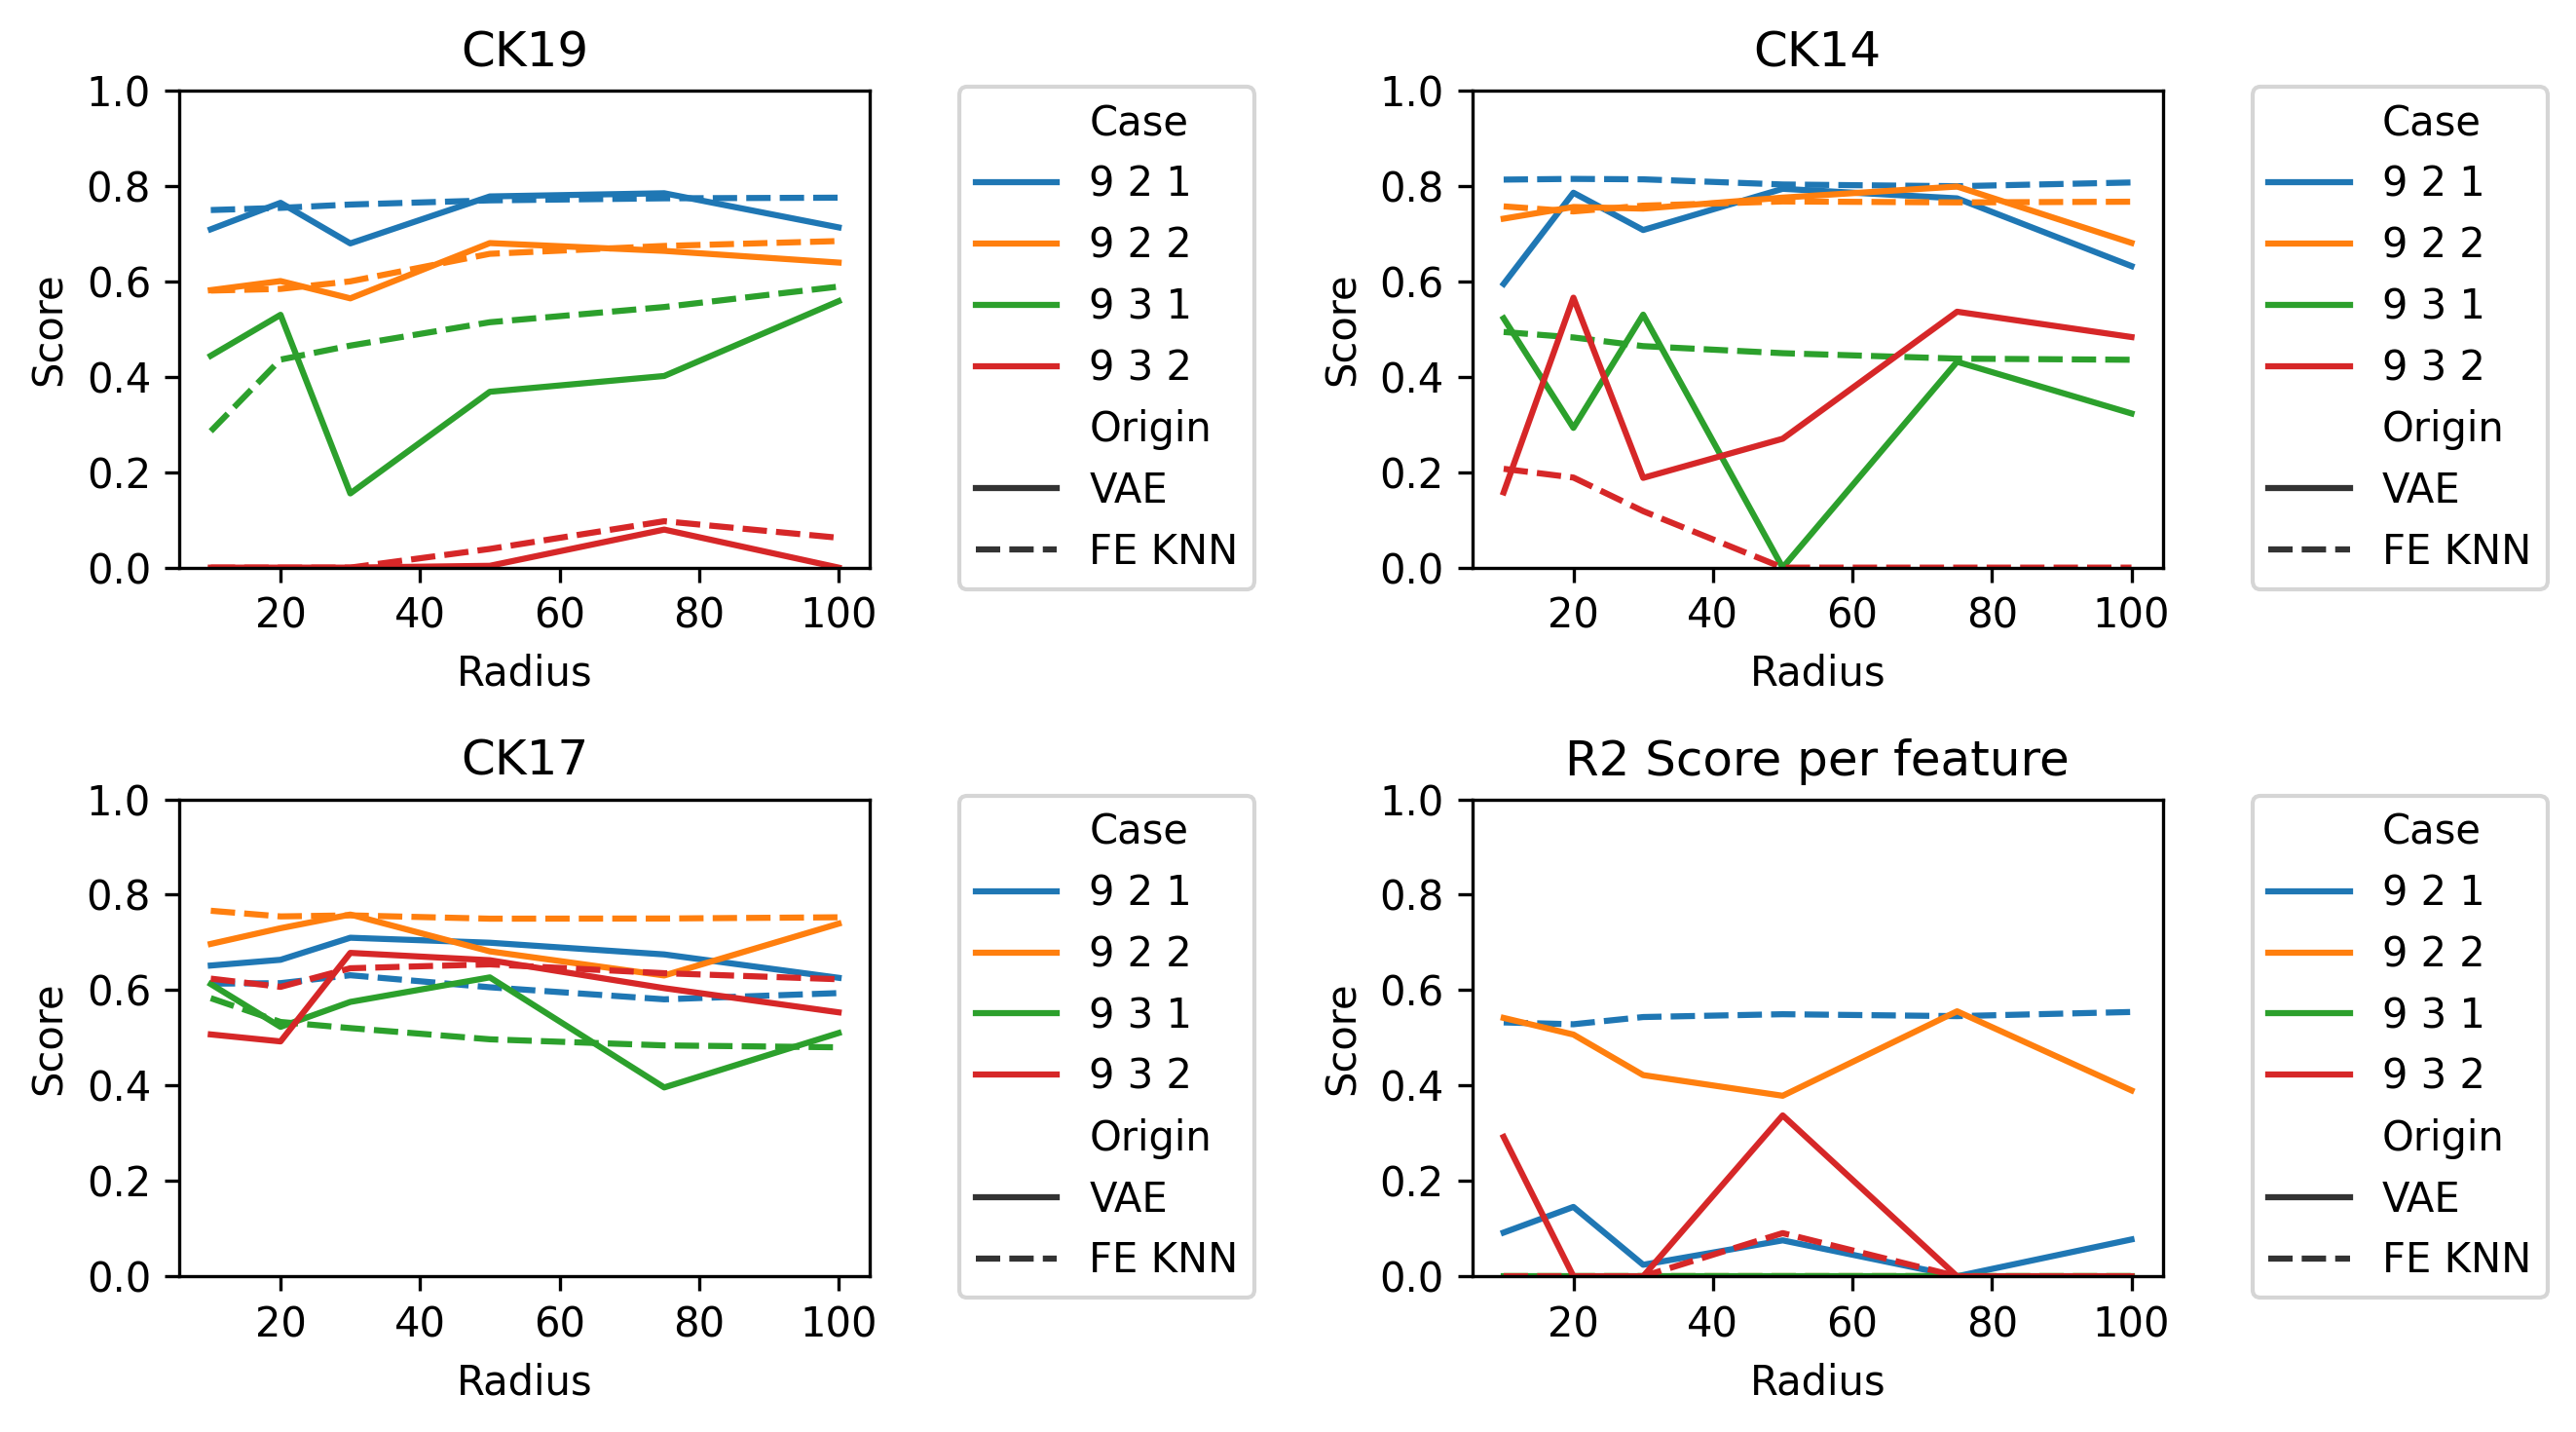

In [145]:

fig, axs = plt.subplots(2, 2, figsize=(9, 5), dpi=300)

row = 0
col = 0

features_of_interest = ["CK19", "CK7", "CK14", "CK17"]
feature_data = all_data_combined_scores[all_data_combined_scores["Feature"].isin(features_of_interest)].copy()

for feature in feature_data["Feature"].unique():
    sns.lineplot(data=feature_data[feature_data["Feature"] == feature], x="Radius", y="Score", hue="Case", style="Origin", ax=axs[row, col])
    axs[row, col].set_title(feature)
    #axs[col, row].get_legend().remove()
    axs[row, col].set_ylim(0, 1)
    axs[row,col].legend(bbox_to_anchor=(1.1, 1.05))
    col +=1
    
    if col == 2:
        col = 0
        row += 1

        
#axs[0][0].legend()


plt.xlabel("Radius")
plt.title("R2 Score per feature")
fig.tight_layout()
plt.show()